In [0]:
import tensorflow as tf
import tensorflow.keras


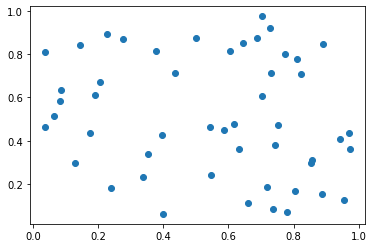

In [2]:
# Código de prueba

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x, y)
plt.show()

In [3]:
import keras
from keras.datasets import mnist

# Lo datos vienen como arreglos de Numpy

(x_train,y_train), (x_test,y_test) = mnist.load_data()


Using TensorFlow backend.


5


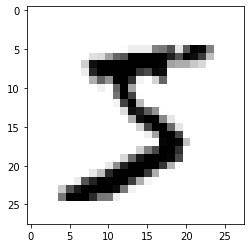

In [4]:
# Se revisa una de las imagenes

import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)  # Color map sirve para colorear la imagen, por ejemplo binary corresponde a blanco y negro
print(y_train[0])



In [5]:
# Los arreglos multidimensionales en los que viene la información son más conocidos como tensores.
print(x_train.ndim)
print(x_train[0].ndim)
print(y_train.ndim)
print(y_train[0].ndim)
print(x_train.shape)
print(x_train[0].shape)
print(y_train.shape)
print(y_train[0].shape)

3
2
1
0
(60000, 28, 28)
(28, 28)
(60000,)
()


In [6]:
# También se pueden analizar los tipos de datos
print(type(x_train))
print(type(y_train))
print(type(y_train[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [7]:
# Normalización/Formateo de los datos para no tener que operar con enteros muy grande sino que con números reales en un intervalo pequeño.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_train[0])

(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [0]:
# Además se utiliza el One hot encodding para facilitar la salida mediante probabilidades
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)




In [10]:
# Ver las nuevas dimensiones
print(y_test.shape)
print(y_test[0])
print(y_train.shape)

(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10)


In [17]:
# Sequential() es la función de keras que permite crear una red neuronal básica
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

model = Sequential()
# Para poder ir agregando capas a este modelo, se utiliza el método .add()
model.add(Dense(128, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
# Keras automáticamente después de la primera capa deduce el input_shape de las siguientes, no es necesario especificarlo.
# En general la capa de salida tendrá tantas neuronas como clases en una clasificación, excepto cuando hay una clasificación binaria, que se usa solo una.
model.summary()
# Nótese que aparte de los parámetros correspondientes a los pesos, se cuentan los parámetros correspondientes a los bias


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compilación del modelo utilizando técnicas de aprendizaje, como métrica se usará accuracy que es la fracción de imagenes correctamente clasificadas
model.compile(loss="categorical_crossentropy",
optimizer="adam",
metrics = ['accuracy'])

In [19]:
# Entrenamiento del modelo, se pasan 100 datos en cada pasada 
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5407 - accuracy: 0.8683
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2572 - accuracy: 0.9275
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2034 - accuracy: 0.9418
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1682 - accuracy: 0.9513
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1417 - accuracy: 0.9593
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1215 - accuracy: 0.9657
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1052 - accuracy: 0.9700
Epoch 8/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0915 - accuracy: 0.9746
Epoch 9/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0804 - accuracy: 0.9783
Epoch 10/20
60000/60000 [==============================

In [20]:
# Evaluando la red con el optimizar Adam y 128 neuronas en las capa oculta (Sólo porque funciona)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

10000/10000 [==============================] - 0s 26us/step
0.9785000085830688


[4.1699439e-04 1.9350823e-06 4.9586961e-05 1.8574347e-06 3.4632303e-05
 2.1117945e-04 9.9798077e-01 5.0363559e-07 1.3025354e-03 7.2106118e-08]


1.0000001

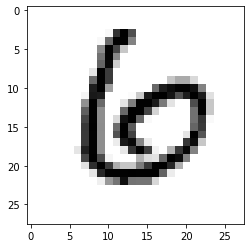

In [27]:
# Realizando predicciones varias
# Por ejemplo se puede predecir una de las imagenes al azar del conjunto de test
plt.imshow(x_test[11].reshape(28,28), cmap=plt.cm.binary)
predictions = model.predict(x_test)
np.argmax(predictions[11])
print(predictions[11])
np.sum(predictions[11])